<a href="https://colab.research.google.com/github/varunxsensei/neural_network_from_scratch/blob/main/NN_with_back_prop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df = pd.read_csv('train.csv')

In [73]:
df.shape

(42000, 785)

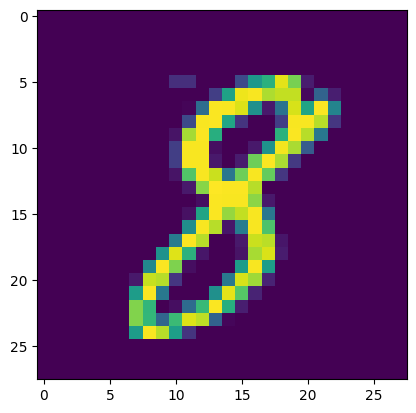

In [74]:
plt.imshow(df.iloc[20,1:].values.reshape(28,28))

In [75]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data = np.array(df)

In [77]:
m,n = data.shape

In [78]:
print(f"Rows {m}, columns {n}")

Rows 42000, columns 785


In [79]:
np.random.shuffle(data)

In [80]:
data_dev = data[0:1000].T

In [81]:
y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

In [82]:
data_train = data[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [83]:
X_train.shape

(784, 41000)

In [84]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    exp_vals = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_vals / np.sum(exp_vals, axis=0, keepdims=True)



def forward_prop(W1,b1,W2,b2,X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(y):
    one_hot_Y = np.zeros((y.size, y.max() + 1))
    one_hot_Y[np.arange(y.size), y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def ReLU_derivative(Z):
  return Z > 0


def back_prop(Z1, A1, Z2, A2, W2, X, y):
    m = X.shape[1]
    one_hot_Y = one_hot(y)
    dZ2 = A2 - one_hot_Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2


def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1,b1,W2,b2


In [86]:
def get_predictions(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions,y):
  print(predictions,y)
  return np.sum(predictions==y)/y.size

def gradient_descent(X,y,iterations,alpha):
  W1,b1,W2,b2 = init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,y)
    W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    if i%50 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, y))
  return W1,b1,W2,b2

In [92]:
W1,b1,W2,b2 = gradient_descent(X_train,y_train,1000,0.05)

Iteration:  0
[4 4 7 ... 9 0 4] [6 6 1 ... 3 8 2]
0.10378048780487804
Iteration:  50
[2 2 1 ... 7 5 4] [6 6 1 ... 3 8 2]
0.2966829268292683
Iteration:  100
[2 6 1 ... 3 5 4] [6 6 1 ... 3 8 2]
0.41909756097560974
Iteration:  150
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.511609756097561
Iteration:  200
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.5767317073170731
Iteration:  250
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.6296829268292683
Iteration:  300
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.6671707317073171
Iteration:  350
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.6976829268292682
Iteration:  400
[6 6 1 ... 3 3 6] [6 6 1 ... 3 8 2]
0.721609756097561
Iteration:  450
[6 6 1 ... 3 3 2] [6 6 1 ... 3 8 2]
0.7418536585365854
Iteration:  500
[6 6 1 ... 3 3 2] [6 6 1 ... 3 8 2]
0.7591463414634146
Iteration:  550
[6 6 1 ... 3 3 2] [6 6 1 ... 3 8 2]
0.7722439024390244
Iteration:  600
[6 6 1 ... 3 8 2] [6 6 1 ... 3 8 2]
0.7846829268292683
Iteration:  650
[6 6 1 ... 3 8 2] [6 6 1 ... 3 8 2]
0.7941219512195122
Iteration

In [93]:
# Forward pass on dev set
Z1_dev, A1_dev, Z2_dev, A2_dev = forward_prop(W1, b1, W2, b2, X_dev)

# Get predictions
predictions_dev = get_predictions(A2_dev)

# Compute accuracy
accuracy_dev = get_accuracy(predictions_dev, y_dev)
print("Dev Set Accuracy:", accuracy_dev)


[0 4 7 8 9 3 9 3 3 9 1 2 3 0 8 7 7 7 8 7 0 0 8 5 7 8 8 7 3 9 9 1 0 3 7 1 4
 7 3 2 7 1 9 1 5 1 1 3 1 0 3 9 6 0 0 9 2 1 8 9 4 0 5 8 1 8 1 7 4 6 0 2 4 5
 5 8 5 4 0 4 3 9 8 5 6 6 3 2 4 6 5 0 1 9 8 0 0 4 8 0 3 3 0 1 1 2 6 1 7 4 9
 0 0 2 0 1 1 3 9 0 1 6 3 0 0 2 9 9 6 4 6 6 8 5 4 1 6 9 9 4 1 0 5 4 4 6 8 2
 3 0 7 2 9 3 4 9 8 7 7 3 1 3 1 0 7 1 8 5 2 6 9 9 5 6 1 7 5 1 4 2 6 7 5 2 4
 9 3 4 9 5 1 3 7 3 9 0 7 6 8 4 8 2 1 5 8 4 7 7 8 9 7 3 7 3 0 2 7 4 9 1 0 5
 0 1 6 3 3 1 4 1 1 8 6 1 7 6 2 0 3 1 9 6 7 2 0 2 6 2 8 6 9 9 3 8 1 2 8 8 7
 1 3 6 2 7 3 5 7 0 3 2 9 6 6 0 1 9 6 2 0 3 4 6 2 6 9 5 4 8 2 6 8 5 7 4 5 6
 3 3 4 4 8 7 9 4 8 9 9 7 7 4 9 3 6 2 6 8 4 4 5 4 9 5 2 9 7 7 1 7 3 7 5 6 8
 8 4 4 3 1 9 5 4 0 0 8 2 6 4 7 5 1 2 1 7 9 9 8 5 1 3 0 3 9 5 1 7 9 6 9 7 8
 2 6 0 9 5 1 6 0 3 0 9 6 6 8 3 7 1 3 3 0 5 8 7 2 7 4 1 3 2 5 6 1 0 3 3 1 6
 2 2 0 7 7 7 8 9 0 8 7 1 9 6 3 3 5 7 8 9 3 8 7 4 3 9 7 1 9 3 7 0 3 0 0 0 2
 9 2 9 5 9 8 6 4 0 4 0 1 9 5 3 1 0 0 9 4 6 8 1 4 9 9 3 5 8 0 0 1 6 0 5 8 1
 7 7 2 3 1 3 8 8 5 4 6 4 

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_dev, predictions_dev))
print(classification_report(y_dev, predictions_dev))


[[94  0  1  1  0  3  1  0  1  0]
 [ 0 98  2  0  0  1  0  0  3  0]
 [ 2  2 78  4  3  2  2  2  8  0]
 [ 1  0  4 80  0  9  0  7  0  2]
 [ 0  0  0  0 81  0  3  1  0  6]
 [ 1  3  0  5  3 62  5  0  7  1]
 [ 2  0  3  0  2  0 82  0  1  0]
 [ 0  2  0  0  1  0  0 96  2 10]
 [ 1  1  3  8  0  8  1  0 68  5]
 [ 0  1  0  1 11  0  0 10  4 88]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       101
           1       0.92      0.94      0.93       104
           2       0.86      0.76      0.80       103
           3       0.81      0.78      0.79       103
           4       0.80      0.89      0.84        91
           5       0.73      0.71      0.72        87
           6       0.87      0.91      0.89        90
           7       0.83      0.86      0.85       111
           8       0.72      0.72      0.72        95
           9       0.79      0.77      0.78       115

    accuracy                           0.83      1000
   macro avg       